# PANDA 01 - Introdução

In [0]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
VINHOS = datasets.load_wine()
print(VINHOS.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
nome_atributos = VINHOS.feature_names
nome_atributos

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
X = VINHOS.data
y = VINHOS.target

In [0]:
np.mean(X[:,0])

13.00061797752809

## Histograma das classes dos vinhos

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

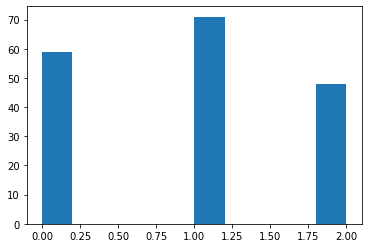

In [0]:
plt.hist(y)

## Análise de álcool e intensidade de cor


Text(0, 0.5, 'Intensidade de cor')

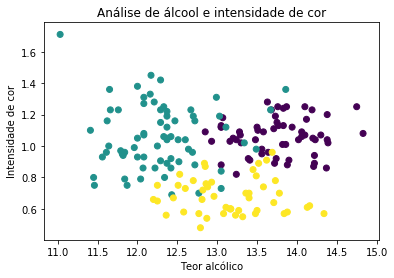

In [0]:
plt.scatter(X[:,0], X[:,10], c=y)
plt.title("Análise de álcool e intensidade de cor")
plt.xlabel("Teor alcólico")
plt.ylabel("Intensidade de cor")

## Análise de Covariância

- Branco -> sem relação
- Vermelho -> relação inversa
- Azul -> relação direta

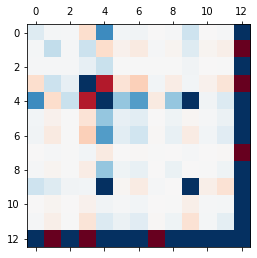

In [0]:
X_corr = np.cov(X.T)
plt.matshow(X_corr, vmin = -5, vmax = 5, cmap="RdBu")

In [0]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

## Aplicando KNN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7407407407407407

# Escalonização dos dados

média = 0, desvio padrão = 1


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_escalonado = scaler.fit_transform(X)

## Análise de Covariancia

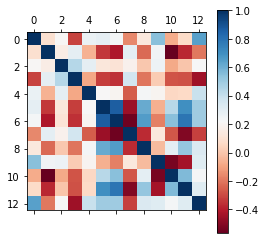

In [0]:
X_corr = np.cov(X_escalonado.T)
plt.matshow(X_corr, cmap="RdBu")
plt.colorbar()

## Análise de álcool e intensidade de cor


Text(0, 0.5, 'Intensidade de cor')

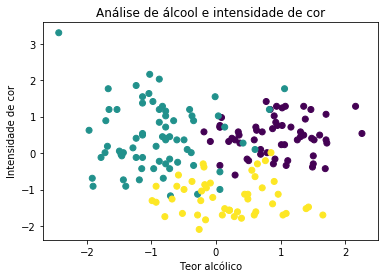

In [0]:
plt.scatter(X_escalonado[:,0], X_escalonado[:,10], c=y)
plt.title("Análise de álcool e intensidade de cor")
plt.xlabel("Teor alcólico")
plt.ylabel("Intensidade de cor")

## Aplicando KNN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_escalonado, y, test_size=0.3, random_state = 42)
knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9629629629629629

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test, )))